##Question 1 - CodeRunner: Regression Rumble

Gradient Decent algorithm is used to optimise our model parameters.

The main idea is that we propagate opposite the direction of the gradient of the cost function at a given hyper parameter w or b.

To understand better, let us get our hands dirty! Below is the code implemented for the linear regression algorithm.

* We generate a regression data using the skikit_learns inbuilt library.
* We generate random weight matrices using the np.random.randn function
* Apply the GD Algorithm
 * Calculate the output of the model.
 * Calculate the error. (Used in the MSE Cost function)
 * Compute the gradient of the Cost function wrt our hyperparameter.
 * Update theta.

Have a look at the code below and fill in the necessary blanks "..."

Note:- Use the Mean Square error as your cost function given as:

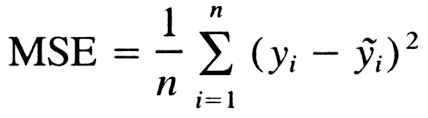

ybar is the predicted output.

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# sklearn.datasets.make_regression is a function in scikit-learn that generates
# a random regression dataset with specified parameters, such as the number of
# samples, number of features, and level of noise.

X, y = make_regression(n_samples=100, n_features=1, noise=10)

In [118]:
def mse_(y,predicted):
    m=len(y)
    Y=y.reshape(100,1)-predicted
    k=0
    for i in range(m):
        k+=Y[i]**2
    cost = k/m
    return cost


In [119]:
def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameter theta (our weight matrix)
    #Use the np.random.randn function for the same.
    theta = np.random.randn(2,1)

    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        # Calculate predicted values:
        predictions = np.dot(X,theta)

        # Calculate the error: use the mse function
        error = -2*(y.reshape((100,1))-predictions)

        # Calculate the gradients: 1/m * X.T * error
        gradients = (1/m)*np.dot(X.T,error)

        # Update parameters: Apply the GD algorithm
        theta -= gradients*learning_rate

        # Calculate the cost function: MSE
        cost = mse_(y,predictions)
        cost_history.append(cost)

    return theta, cost_history



In [120]:
# Set the learning rate and number of iterations
learning_rate = 0.75
# Increased the learning_rate so that we can get regression line with fewer iterations

num_iterations = 50

O=np.ones((100,1))

# Transforming the dataset X so that we can perform necessary operations
X_=np.append(X,O,axis=1)

# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(X_,y,learning_rate,num_iterations)

#checking if the cost function is stable
print(cost_history)


[array([7735.97241531]), array([3626.96108654]), array([1734.90397785]), array([861.18353241]), array([457.09314232]), array([270.04967364]), array([183.43366709]), array([143.31410434]), array([124.72883083]), array([116.11867603]), array([112.1296343]), array([110.2814957]), array([109.42523708]), array([109.02852288]), array([108.84472021]), array([108.759562]), array([108.72010704]), array([108.701827]), array([108.69335761]), array([108.68943362]), array([108.68761558]), array([108.68677326]), array([108.686383]), array([108.68620218]), array([108.68611841]), array([108.6860796]), array([108.68606161]), array([108.68605328]), array([108.68604942]), array([108.68604763]), array([108.68604681]), array([108.68604642]), array([108.68604624]), array([108.68604616]), array([108.68604612]), array([108.68604611]), array([108.6860461]), array([108.68604609]), array([108.68604609]), array([108.68604609]), array([108.68604609]), array([108.68604609]), array([108.68604609]), array([108.686046

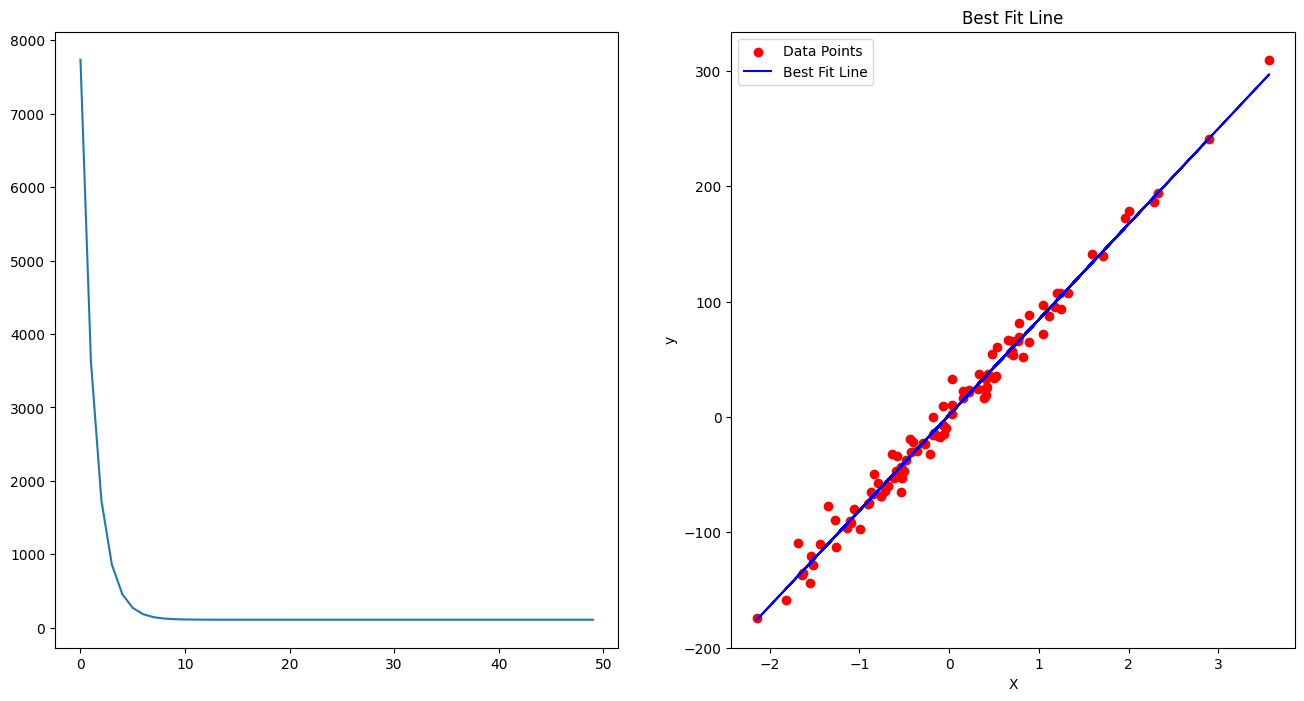

In [121]:
plt.figure(figsize=(16,8))
# Plot the cost function over iterations
plt.subplot(1,2,1)
plt.plot(cost_history)

# Plot the best fit line
plt.subplot(1,2,2)
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, np.dot(X_, theta), color='blue', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

##Question 2 - CodeRunner: Regression Rumble II

The Logistic Regression algorithm is similar to Linear Regression minus the introdiction of a sigmoid activation function.

We also use the Binary Cross Entropy Cost function istead of MSE.

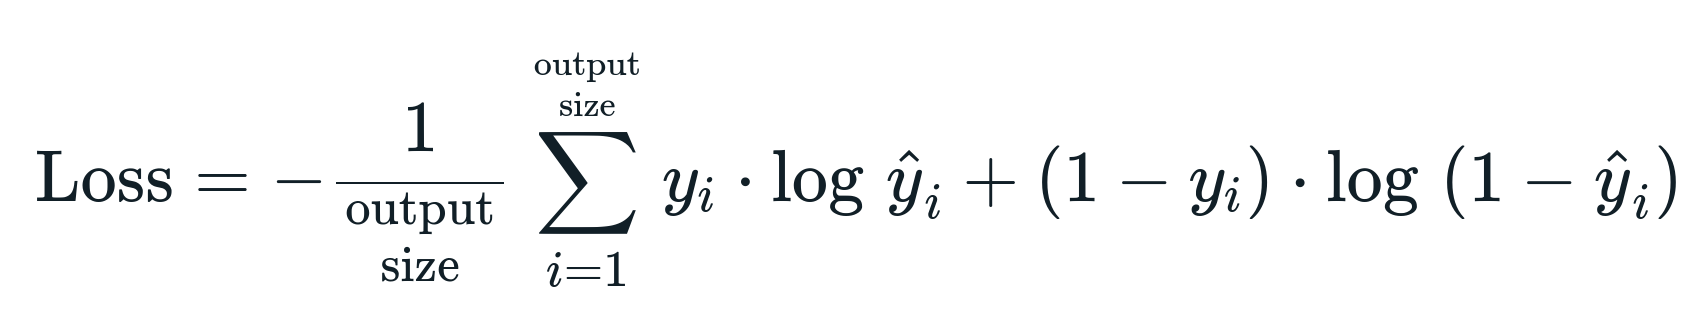


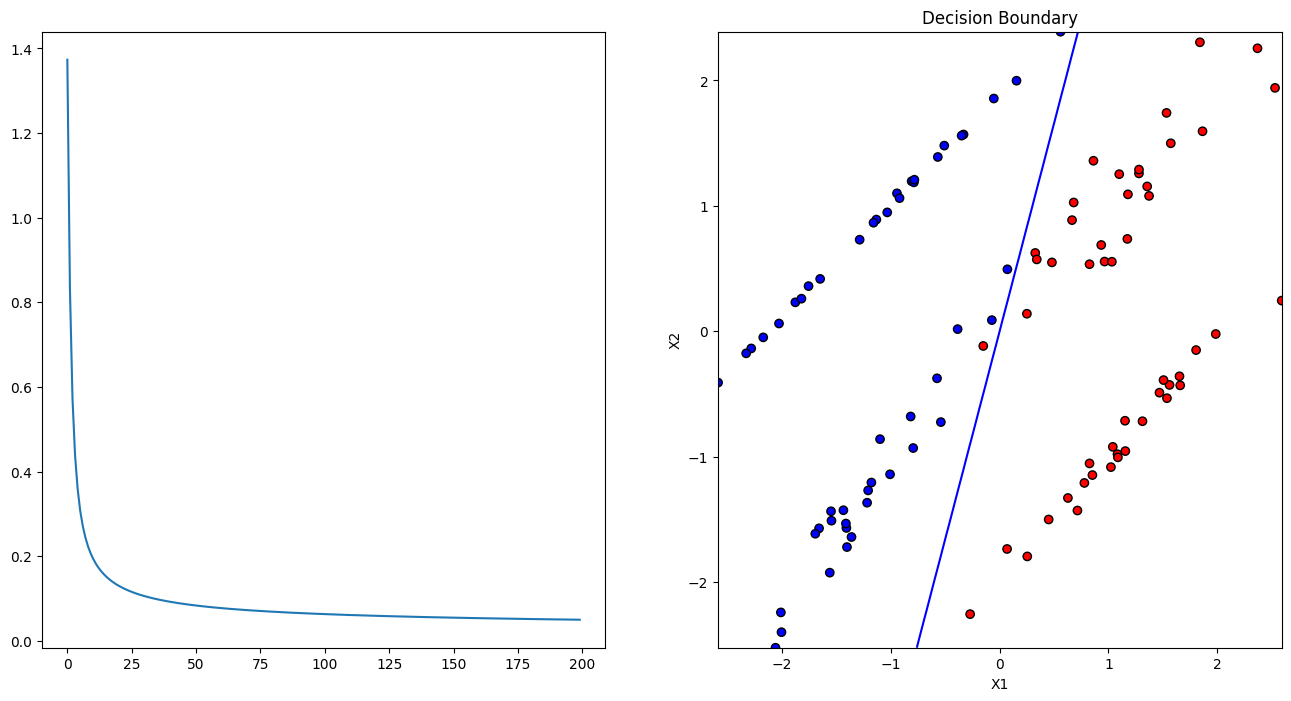

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def sigmoid(z):
    # Sigmoid function
    h=1/(1+np.exp(-z))
    return h

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta
    theta=np.random.randn(2,1)

    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted probabilities using the sigmoid function.
        predictions = sigmoid(np.dot(X,theta))

        # Calculate the error: y_pred - y
        error = predictions-y.reshape((100,1))

        # Calculate the gradients:
        gradients = (1/m)*np.dot(X.T,error)

        # Update parameters:
        theta -= gradients*learning_rate

        # Calculate the cost function: log loss
        cost = (-1/m)*(np.dot(y,np.log(predictions))+np.dot((1-y),np.log(1-predictions)))
        cost_history.append(cost)

    return theta, cost_history

# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Set the learning rate and number of iterations
learning_rate = 0.9
num_iterations = 200

# Call the logistic_regression function and store the results
theta, cost_history = logistic_regression(X, y, learning_rate, num_iterations)

plt.figure(figsize=(16,8))

# Plot the cost function over iterations
plt.subplot(1,2,1)
plt.plot(cost_history)

# Plot the decision boundary
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()